# EXPERIMENT 1

### ML Prcatices
    - Logistic Regression
    - Naive-Bayes Classifier
    - K-nearest Neighbor classifier
    - Support vector classifier
    - Decision tree classifier
    - Random forest c

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 

warnings.filterwarnings("ignore")


%matplotlib inline

In [5]:
data = pd.read_csv('D:/research-assistant/datasets/ml_dataset.csv')
data.head()

,Unnamed: 0,cik,size,ni,zscore,leverage,prloss,chgdt,cfo,liquidity,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,bankruptcy
0,0,1923,4.633233,-0.457,-1.379207,0.782724,1,0.0,0.068627,0.070678,...,0,0,0,0,0,0,0,0,0,False
1,1,1961,0.674983,-8.920,22.164456,2.979633,1,0.0,-2.646130,0.019348,...,0,0,0,0,0,0,0,0,0,False
2,2,2062,4.720426,2.224,0.000000,0.665966,1,0.0,-0.072984,0.066363,...,0,0,0,0,0,0,0,0,0,False
3,3,2186,2.913546,-1.428,-1.775756,0.654761,1,0.0,-0.023179,0.011291,...,0,0,0,0,0,0,0,0,0,False
4,4,2491,5.861604,-15.035,1.420819,1.140723,1,0.0,-0.008423,0.091219,...,0,0,0,0,0,0,0,0,0,False


In [8]:
def preprocessing (x):
    x = x.drop(columns = ['Unnamed: 0','cik'])
    shape = x.shape[1] - 1
    
    # Normalizing the data
    sc = StandardScaler()
    x.iloc[:,range(0,shape)] = sc.fit_transform(x.iloc[:,range(0,shape)])

    
    # splitting the dataset
    X = x.iloc[:,range(0,shape)]
    Y = x.iloc[:,shape]
    x_train,x_test, y_train,y_test = train_test_split( x.iloc[:,range(0,shape)], x.iloc[:,shape], random_state = 123, test_size = 0.20 )
    #print(x_train.head())
    
    #Testing dataset
    y_test = pd.DataFrame(y_test)
    testing = x_test.join(y_test)
       
    #Training dataset
    y_train = pd.DataFrame(y_train)
    training = x_train.join(y_train)
    
    #splitting the data 
    data_majority = training[training['bankruptcy']==0]
    data_minority = training[training['bankruptcy']==1]
    
    #upsampling dataset
    count = data_majority["bankruptcy"].value_counts()
    count = count[0]
    
    #upsample minority class
    data_minority_upsampled = resample(data_minority,
                                  replace = True,
                                  n_samples = count,
                                  random_state = 123)
    df_upsampled = pd.concat([data_majority, data_minority_upsampled])
    #print(df_upsampled.head())
    y_upsampledtrain = df_upsampled["bankruptcy"]
    x_upsampledtrain = df_upsampled.drop(columns = ["bankruptcy"], axis=1)
    y_upsampledtrain = pd.DataFrame(y_upsampledtrain)

    
    print('Preprocessing Complete')
    return(X, x_train, x_test, Y, y_train, y_test, x_upsampledtrain, y_upsampledtrain, testing)

In [9]:
X, x_train, x_test, Y, y_train, y_test, x_upsampledtrain, y_upsampledtrain, testing = preprocessing(data)

Preprocessing Complete


### Logistic Regression

0.9779559118236473
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1340
        True       1.00      0.79      0.88       157

    accuracy                           0.98      1497
   macro avg       0.99      0.89      0.94      1497
weighted avg       0.98      0.98      0.98      1497



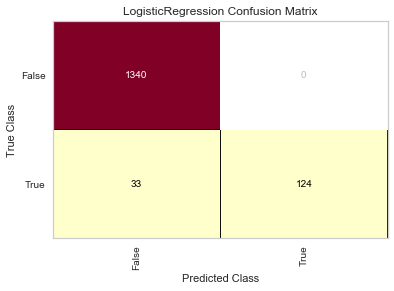

In [18]:
logmodel = LogisticRegression(random_state=123)
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(logmodel)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(logmodel, X, Y, cv=5)
scores.sum()/5
data['logmodel_pred'] = logmodel.predict(X)

### Naive-Bayes Classifier

0.9799599198396793
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1340
        True       1.00      0.81      0.89       157

    accuracy                           0.98      1497
   macro avg       0.99      0.90      0.94      1497
weighted avg       0.98      0.98      0.98      1497



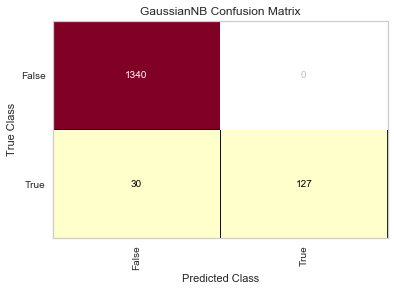

In [22]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(nb)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(nb, X, Y, cv=5)
scores.sum()/5
data['naivebayes_pred'] = nb.predict(X)

### K-Nearest Neighbors Classifier

0.9632598530394122
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1340
        True       0.97      0.67      0.79       157

    accuracy                           0.96      1497
   macro avg       0.97      0.83      0.89      1497
weighted avg       0.96      0.96      0.96      1497



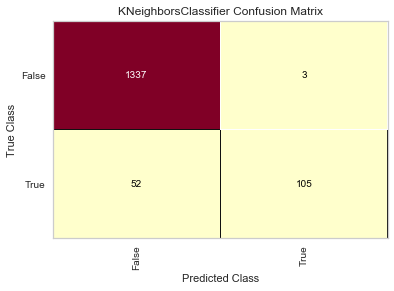

In [23]:
KN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p= 2)
KN_classifier.fit(x_train, y_train)
y_pred = KN_classifier.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(KN_classifier)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(KN_classifier, X, Y, cv=5)
scores.sum()/5
data['KN_pred'] = KN_classifier.predict(X)

### Support-Vector Classifier

In [8]:
# svc_classifier = SVC(kernel =  'rbf', random_state = 123)
# params_svc = [{'C':[1,10,100,1000], 'kernel': ['linear']}, 
#               {'C':[1,10,100,1000], 'kernel': [ 'rbf'], 'gamma' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
# grid_search_svc = GridSearchCV(estimator = svc_classifier, param_grid = params_svc, scoring = 'accuracy', cv= 10, n_jobs = -1)

# grid_search_svc =grid_search_svc.fit(x_train, y_train)
# best_accuracy = grid_search_svc.best_score_
# best_estimators = grid_search_svc.best_params_
# print(best_accuracy)
# print(best_estimators)


0.9779559118236473
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1340
        True       1.00      0.79      0.88       157

    accuracy                           0.98      1497
   macro avg       0.99      0.89      0.94      1497
weighted avg       0.98      0.98      0.98      1497



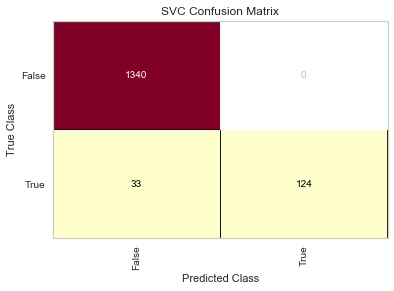

In [24]:
svc_classifier = SVC( kernel =  'rbf', random_state = 123)
svc_classifier.fit(x_train, y_train)
y_pred = svc_classifier.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(svc_classifier)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(svc_classifier, X, Y, cv=5)
scores.sum()/5
data['svc_pred'] = svc_classifier.predict(X)

### Decision Tree Classifier

0.9645958583834335
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1340
        True       0.82      0.85      0.83       157

    accuracy                           0.96      1497
   macro avg       0.90      0.91      0.91      1497
weighted avg       0.97      0.96      0.96      1497



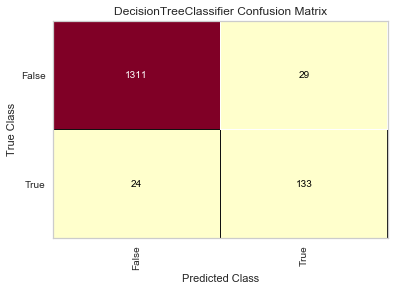

In [26]:
DC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
DC_classifier.fit(x_train, y_train)
y_pred = DC_classifier.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(DC_classifier)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(DC_classifier, X, Y, cv=5)
scores.sum()/5
data['DC_pred'] = DC_classifier.predict(X)

### Random Forest Classifier

0.9645958583834335
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1340
        True       0.82      0.85      0.83       157

    accuracy                           0.96      1497
   macro avg       0.90      0.91      0.91      1497
weighted avg       0.97      0.96      0.96      1497



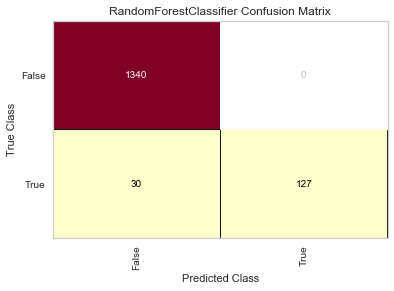

In [27]:
rf_model = RandomForestClassifier(random_state = 123, n_estimators = 500, criterion = 'entropy',max_leaf_nodes=1000, max_depth  = 15,  n_jobs=-1)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)
y_pred_proba = [p[1] for p in y_pred_proba]
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(rf_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(rf_model, X, Y, cv=5)
scores.sum()/5
data['rf_pred'] = rf_model.predict(X)

### XGBoost classifier

0.978623914495658
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1340
        True       1.00      0.80      0.89       157

    accuracy                           0.98      1497
   macro avg       0.99      0.90      0.94      1497
weighted avg       0.98      0.98      0.98      1497



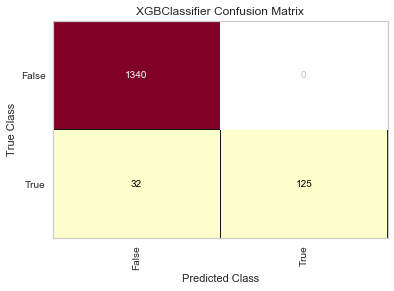

In [28]:
steps = 20  # The number of training iterations
xgb_model = XGBClassifier( eta = 0.3,max_depth = 5, objective = 'multi:softprob', scale_pos_weight = 1, num_class = 3)
xgb_model.fit(x_train, y_train)
y_preds = xgb_model.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test,y_preds))
viz = ConfusionMatrix(xgb_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(xgb_model, X, Y, cv=5)
scores.sum()/5
data['xgb_pred'] = xgb_model.predict(X)

In [15]:
testing['probability_score'] =  y_pred_proba
testing['predicted_label'] = y_pred_rf
testing.to_csv('D:/research-assistant/datasets/test2.csv')
testing.head()

,size,ni,zscore,leverage,prloss,chgdt,cfo,liquidity,mkbk,litigate,...,2012,2013,2014,2015,2016,2017,2018,bankruptcy,probability_score,predicted_label
1877,0.662708,0.096449,-0.068007,-0.074109,0.117563,-0.008747,0.097606,-0.719299,-0.004026,-0.673335,...,-0.174461,-0.207903,-0.178885,-0.160106,-0.172417,-0.176484,-0.099946,False,0.003341,False
4427,0.197077,0.051641,-0.059043,-0.075824,0.117563,-0.008747,0.068863,-0.183933,0.031367,1.485145,...,-0.174461,-0.207903,-0.178885,-0.160106,-0.172417,-0.176484,-0.099946,False,0.003349,False
3043,0.072761,0.067511,-0.061769,-0.081801,0.117563,-0.008747,0.033182,0.953750,-0.001693,-0.673335,...,-0.174461,-0.207903,-0.178885,-0.160106,-0.172417,-0.176484,-0.099946,False,0.048711,False
2835,0.181057,0.076228,-0.065545,-0.074441,0.117563,-0.008747,0.112562,-0.731245,-0.004394,-0.673335,...,-0.174461,-0.207903,-0.178885,-0.160106,-0.172417,-0.176484,-0.099946,False,0.000518,False
6592,-0.183904,0.056201,-0.038326,0.047136,0.117563,-0.008747,-0.059689,-0.737850,-0.005284,1.485145,...,-0.174461,4.809936,-0.178885,-0.160106,-0.172417,-0.176484,-0.099946,False,0.012122,False


In [29]:
data.to_csv('D:/research-assistant/datasets/data1.0.csv')